In [148]:
##### Ще създадем модели, които се опитват да обяснят данните
import statsmodels.api as sm # съдържа методи за линейна регресия, логистична регресия и др.
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy # не е нужно да внасяме (съдържа се в statsmodels), но за демонстрация; може да се ползва напр. със scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [149]:
# първо отваряме нашия файл за четене, като му даваме кратко име mycsv
mycsv = pd.read_csv('pendulum_data.csv') # headers се слагат автоматично да е първият ред, ако csv файлът има header-и
mycsv.head(5) # с горния код отваряме файла за четене

,id,numer_periods,total_time,period,length,g
0,0,10,21.853762,2.185376,1.236076,10.217681
1,1,5,9.150521,1.830104,0.865746,10.204661
2,2,7,6.934267,0.990610,0.248883,10.012675
3,3,2,4.561148,2.280574,1.397758,10.609702
4,4,5,9.408148,1.881630,0.946346,10.552162


In [150]:
pend = pd.DataFrame(mycsv) # дефинираме Data Frame чрез pd.DataFrame(файл с данни)
pend.head() 

#pend.period.head() # може да отделим конкретна колона
#pend[['period','g']].head() # може да покажем конкретни колони
#pend[pend.columns[1:4]].head() # може да покажем конкретни колони
#pend['new_test']=pend.g+pend.id # създаваме нова колона в резултат на операции между две колони

#del pend['new'] # изтриване на колона
#del pend['new_test']

,id,numer_periods,total_time,period,length,g
0,0,10,21.853762,2.185376,1.236076,10.217681
1,1,5,9.150521,1.830104,0.865746,10.204661
2,2,7,6.934267,0.990610,0.248883,10.012675
3,3,2,4.561148,2.280574,1.397758,10.609702
4,4,5,9.408148,1.881630,0.946346,10.552162


In [151]:
subpen = pd.DataFrame(mycsv, columns=['period','length','g']) # отделяме в DataFrame само колоните, които ни интересуват 
subpen.head()
#####
# за показване на определена колона:  subpen['g'] или subpen.g
#
# Създаваме нова колона length/g ИЛИ np.sqrt(subpen.length) ИЛИ друга според модела
#subpen['leg']=subpen.length.div(subpen.g) # колоната с l/g носи името leg
#subpen['leg']=subpen.length/subpen.g # същото като горе; става и с + - *
#subpen['recsqrtg']=np.reciprocal(np.sqrt(subpen.g)) # колоната с 1/g носи името recsqrtg
#subpen['persq']=np.square(subpen.period) # колоната с T^2 носи името persq

#subpen['sqleg']= np.sqrt(subpen.leg) # колоната с sqrt(l/g) носи името sqleg
subpen['sqlength']= np.sqrt(subpen.length) # колоната с sqrt(g) носи името sqlength

subpen.sqlength.head()
subpen.head()

,period,length,g,sqlength
0,2.185376,1.236076,10.217681,1.111789
1,1.830104,0.865746,10.204661,0.930455
2,0.990610,0.248883,10.012675,0.498882
3,2.280574,1.397758,10.609702,1.182268
4,1.881630,0.946346,10.552162,0.972803


In [152]:
# ВАЖНО  Действия колона1.add(колона2); аналогично с функциите sub(), mul(), div()

# събира стойности на една колона с тези на друга колона: g+T  
subpen.g.add(subpen.period)

# Функции, действащи върху всеки елемент от колоната np.sqrt(subpen.length)
np.sqrt(subpen.length)

(pend.g.mean(), pend.g.std()) # различни статистически функции
subpen.g.describe() # елементарна таблица, обобщаваща колоната
subpen.describe() # елементарна таблица, обобщаваща DaFr

subpen.cov() # covariance и correlation за Data Frame
subpen.corr() 

,period,length,g,sqlength
period,1.000000,0.991128,0.242717,0.998828
length,0.991128,1.000000,0.305703,0.993577
g,0.242717,0.305703,1.000000,0.287688
sqlength,0.998828,0.993577,0.287688,1.000000


                                 OLS Regression Results                                
Dep. Variable:                 period   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.529e+05
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    3.51e-96
Time:                        17:41:28   Log-Likelihood:                          121.89
No. Observations:                  50   AIC:                                     -241.8
Df Residuals:                      49   BIC:                                     -239.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

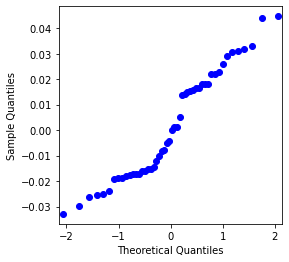

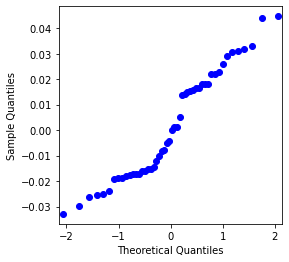

In [153]:
# Линейна регресия. Ще проверим модел от вида Т=const*sqrt(l), където очакваме const = 2*pi/(g^1/2)

pendat = pd.DataFrame(subpen, columns=['period','sqlength']) #създаваме нова DaFr с колоните, които ни трябват
pendat.head() # можем да използваме и subpen, естествено!

## разглеждаме модел на 'period' с една независима променлива 'sqlength', като знаем каква зависимост да очакваме
# в Patsy това е period ~ -1 + sqlength

# fit the model to the data using ordinary linear square, for which we use the smf.ols class
modelg = smf.ols("period ~ -1 + sqlength", pendat) # Create an instance of model class; "modelg" е името на модела
resultg = modelg.fit() # invoke the fit method, резултатът се казва "resultg"

print(resultg.summary()) # можем да научим доста неща от таблицата, но и някои, които не ни трябват

resultg.resid.head() # the residuals of the model fit to the data; проверяваме доколко те са нормално разпределени чрез тест:
z, p = stats.normaltest(resultg.fittedvalues.values) # хипотезен тест за нормалност, output Z съответната p-value
(z, p) # ако p е малкo, можем да отхвърлим нулевата хипотеза, че резидиумите са нормално разпределени

fig, ax = plt.subplots(figsize=(4, 4)) # графична проверка можем да направим и с QQ плот; тук приготвяме размера и оста
smg.qqplot(resultg.resid, ax=ax) # в нашия случай графиката не е линейна (не е учудващо)

# resultg.params # доволни или не от модела, просто вземаме параметъра const = 2*pi/(g^1/2)

# fig, ax1 = plt.subplots(figsize=(6, 4)) # ще подходим графично и показваме фитнатите vs истински стойности
# smg.plot_fit(resultg, 0, ax=ax1) # използваме функцията plot_fit

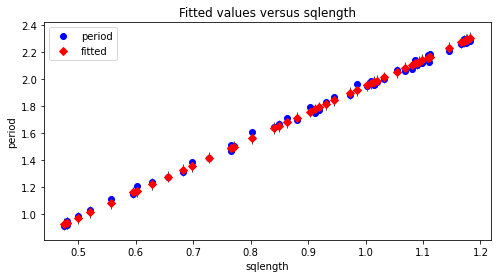

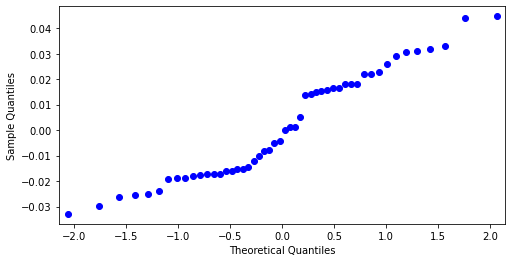

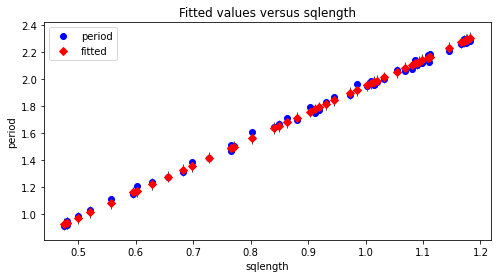

In [154]:
fig, ax = plt.subplots(figsize=(8, 4)) # графична проверка можем да направим и с QQ плот; тук приготвяме размера и оста
smg.qqplot(resultg.resid, ax=ax) # в нашия случай графиката не е линейна (не е учудващо)

fig, ax1 = plt.subplots(figsize=(8, 4)) # ще подходим графично и показваме фитнатите vs истински стойности
smg.plot_fit(resultg,0, ax=ax1) # използваме функцията plot_fit
#smg.plot_fit(resultg, 1, ax=ax2) # това остава, ако имаме втора променлива

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |

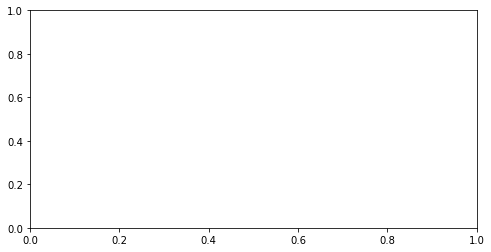

In [156]:
help(plt.subplots(figsize=(8, 4)))